## Lifecycle of a data  science projects
 1. Data collection statergies
 2. Feature engineering---
 3. Handeling Missing values

In [1]:
df = pd.read_csv('titanic_train.csv')

<IPython.core.display.Javascript object>

In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [4]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df.head()

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
df['Cabin_null'].mean()

0.7710437710437711

In [6]:
df[['Cabin_null','Cabin']]

,Cabin_null,Cabin
0,1,NaN
1,0,C85
2,1,NaN
3,0,C123
4,1,NaN
...,...,...
886,1,NaN
887,0,B42
888,1,NaN
889,0,C148


#### What are the different types of Missing Data?

### Missing at random(MAR)

### All the techniques for handeling missing values

1. Mean , meadian , mode replacement
2. Random sample  ipmputation
3. Capturing NAN values with new features
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent catagories imputation


#### Mean / Median / Mode Imputation

We will replace NAN with the most frequent occured variable

In [7]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [8]:
df.isnull

<bound method DataFrame.isnull of      Survived   Age     Fare
0           0  22.0   7.2500
1           1  38.0  71.2833
2           1  26.0   7.9250
3           1  35.0  53.1000
4           0  35.0   8.0500
..        ...   ...      ...
886         0  27.0  13.0000
887         1  19.0  30.0000
888         0   NaN  23.4500
889         1  26.0  30.0000
890         0  32.0   7.7500

[891 rows x 3 columns]>

In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
median = df.Age.median()

In [12]:
def impute(df,variable,median):
    df[variable+"_median"]= df[variable].fillna(median)

In [13]:
impute(df,'Age',median)

In [14]:
df[['Age','Age_median']]

,Age,Age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


In [15]:
print(+df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

********************************************************************************************************

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()el

SyntaxError: invalid syntax (<ipython-input-80-aed212c1d188>, line 5)

*******************************************************************************************************************

## Advantages and disadvantages of mean median imputation

### Advantages
1. easy to implement
2. Fast way to obtain complete dataset

### Disadvantages
1. Change or Distortion in the orginal  variance 
2. Impacts correlation



## Random sample imputation

Aim :  It consists of taking random observation from dataset and we use this obervation to replace NAN values

#### When It should be used
It  assumes that the data missing are completly random (MCAR)
 

In [18]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [19]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [20]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [55]:
df['Age'].index(349)

TypeError: 'RangeIndex' object is not callable

In [41]:
df['Age'].dropna().sample()

349    42.0
Name: Age, dtype: float64

In [65]:
df["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [66]:
def impute(df,variable,median):
    df[variable+"_median"]= df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #It has the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # Pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [68]:
median = df['Age'].median()

In [52]:
df['Age'].dropna().sample(177,random_state=0)


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df['Age'].dropna().sample(df["Age"].isnull().sum(),random_state=0)

In [59]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [60]:
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [63]:
df[df['Age'].isnull()].isnull().index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [69]:
impute(df,'Age',median)

In [70]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

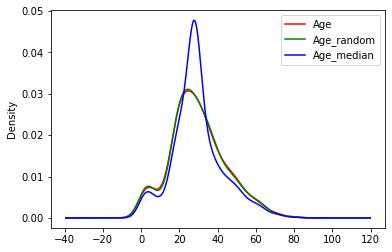

In [88]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind ='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
df.Age_median.plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
 - Easy to implement
 - There is less  distortion in variance

### Disadvantages
 - Every situation randomness wont work

## ----------------------------------------------------------------------------------------------

### Capturing NAN values with new feature

It works well when data are not missing completly at random

In [3]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [6]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [7]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
 - Easy to implement
 - Captures the importance of missing values

#### Disadvantages
 - Creating aditional Features (Curse of dimentionality)

## -----------------------------------------------------------------------------------------

### End of distribution imputation

In [1]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [8]:
extreme=df.Age.mean()+3*df.Age.std()

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

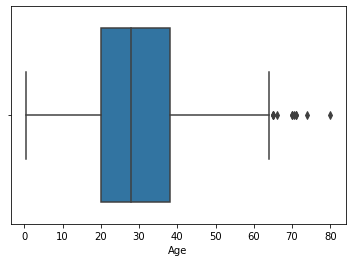

In [3]:
sns.boxplot('Age',data=df)

<AxesSubplot:>

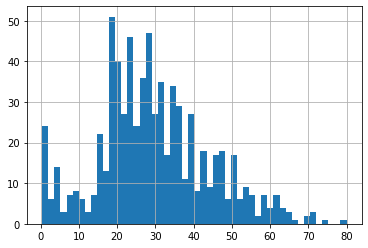

In [6]:
df.Age.hist(bins=50)

In [7]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distrubution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)


In [9]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [11]:
df.head(10)

,Survived,Age,Fare,Age_end_distrubution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

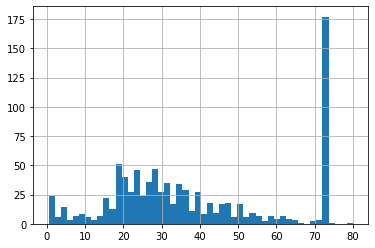

In [13]:
df['Age_end_distrubution'].hist(bins=50)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distrubution'>

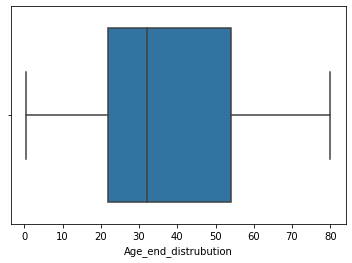

In [14]:
sns.boxplot('Age_end_distrubution',data=df)

### ----------------------------------------------------------------------------------------------------------


### Arbitraaty imputation

** This technique was derived from kagle compitetion
 - It consists of replacing NAN by arbitraty value

In [9]:
df= pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan_var(df,variable,)

#### Arbitrary value 
 - It should not be frequently present

### Advantages
  - Easy to implement
  - Captures the importance of missing values if there is one
 
 ### Disadvantages
  - Distorts the original distrubution of the variable
  - If missingness is not important , It may mask the predective power of the original variable by distorting its distrubution
  - Hardto decide which value to use

### ----------------------------------------------------------------

### How to handle  catagorical missing values

#### Frequent Catagory imputation

In [15]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

<AxesSubplot:xlabel='BsmtQual'>

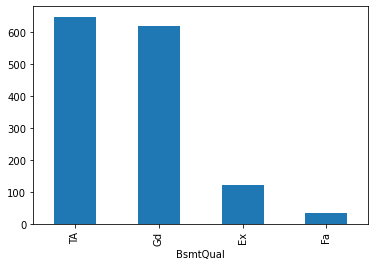

In [33]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [26]:
def impute(df,variable, )

SyntaxError: invalid syntax (<ipython-input-26-b1879bac17f9>, line 1)

<AxesSubplot:>

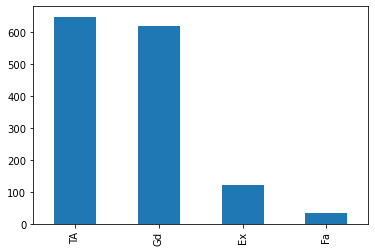

In [36]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

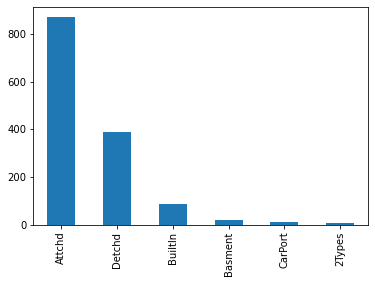

In [39]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

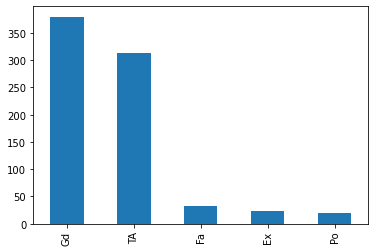

In [40]:
df['FireplaceQu'].value_counts().plot.bar()

In [42]:
def impute_nan(df,variable):
    most_frequent = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent,inplace=True)

In [43]:
impute_nan(df,'GarageType')

In [46]:
impute_nan(df,'BsmtQual')

In [47]:
df.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

### Advantages
- Easy to implement
- Faster way to implement

### Disadvantages
- Since we are using the more frequent lables it may use them in an over represented way if there are many NANs.
- It distorts the relation of the most frequent variable

### ---------------------------------------------------------------------------------

### Adding a variable to capture NAN

In [51]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
df['BsmtQual_null']=np.where(df['BsmtQual'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [56]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_null
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [64]:
df['BsmtQual'].fillna(df["BsmtQual"].value_counts().index[0],inplace=True)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_null
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [69]:
df['FireplaceQu_null']= np.where(df['FireplaceQu'].isnull(),1,0)

<IPython.core.display.Javascript object>

In [72]:
df['FireplaceQu'].fillna(df["FireplaceQu"].mode()[0],inplace=True)

In [73]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_null,FireplaceQu_null
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


#### Suppose if we have more freuent catagories , we just replace NAN with a new catagory

In [3]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


<IPython.core.display.Javascript object>

In [6]:
def impute(df,variable):
    df[variable+"_new"]= np.where(df[variable].isnull(),'Missing',df[variable])

In [7]:
impute(df,"FireplaceQu")

<IPython.core.display.Javascript object>

In [8]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_new
0,Gd,NaN,Attchd,208500,Missing
1,Gd,TA,Attchd,181500,TA
2,Gd,TA,Attchd,223500,TA
3,TA,Gd,Detchd,140000,Gd
4,Gd,TA,Attchd,250000,TA
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,TA
1456,Gd,TA,Attchd,210000,TA
1457,TA,Gd,Attchd,266500,Gd
1458,TA,NaN,Attchd,142125,Missing
